In [24]:
import os
import numpy as np
from tqdm import tqdm
import nrrd
import h5py as h5
import matplotlib.pyplot as plt

In [49]:
path = "../data/BIIAX/"


vol_file = "285_10-layer_01_1.nrrd"
# seg_file = "160_10-layer_0055_prediction24_02_06.seg.nrrd"
assert os.path.exists(os.path.join(path,vol_file)) #and os.path.exists(os.path.join(path,seg_file))

### load the volume

In [50]:
vol , header = nrrd.read(os.path.join(path,vol_file))
# seg , header_seg = nrrd.read(os.path.join(path,seg_file))

In [51]:
print(vol.dtype)
print(vol.nbytes/1024**2)
print(vol.shape)

# print(seg.dtype)
# print(seg.nbytes/1024**2)
# print(seg.shape)

uint16
75.0
(600, 256, 256)


In [52]:
# seg_new = seg
vol_new = vol

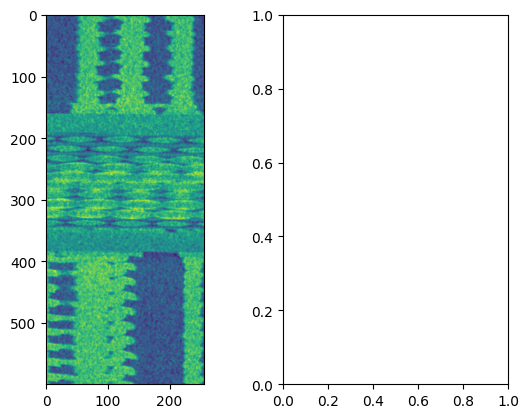

In [53]:


fig, axs = plt.subplots(1,2)

axs[0].imshow(vol[:,:,108])
# axs[1].imshow(seg[:,:,108])

In [54]:
fout = os.path.splitext(vol_file)[0] + ".vol.h5"
print(fout)

285_10-layer_01_1.vol.h5


In [55]:
out = {}
out['raw'] = vol_new[:,:,:]
# labels = seg_new[:,:,:108]

out['volume_data'] = {
    'SizeX': 2300,
    'SizeY': 2300,
    'SizeZ': 500,
    'Origin': (0,0,0),
    'VoxelSizeX': 0.020618,
    'VoxelSizeY': 0.020618,
    'VoxelSizeZ': 0.020618,
    'Datatype': "uint16",
    'UsedBits': 16,
    'Offset': 413.954,
    'Scale': 9.44285,
    'Min': 0,
    'Max': 65535,
    'HistogramUpToDate': "true"
    }

# obj_ids = np.unique(labels)
# obj_ids = obj_ids[0:]
# masks = labels == obj_ids[:, None, None, None]


# out['labels'] = labels.transpose(2,0,1)
# out['masks'] = masks.transpose(0,3,1,2)

# for key in out.keys():
#     print(out[key].shape)

In [56]:
with h5.File(fout, 'w') as fout:
    
    for key in out.keys():
        if key == "volume_data":
            volume_group = fout.create_group('volume_data')
            for key, value in out["volume_data"].items():
                volume_group.create_dataset(key, data=value)
        else:
            fout.create_dataset(key, data = out[key],compression="gzip")

In [14]:
print(obj_ids)

[0. 1. 2.]


In [16]:
plt.imshow(masks[0,:,:,20])

In [42]:
np.unique(masks[0,:,:,20])

array([False,  True])